## Observations and Insights 

1. The bar graph depicted that the Drug regimen capomulin has the maximum number of mice at 230 and the drug Zoniferol
has the smaller mice number at 182.The total mice count by gender showed that there were 124 females and 125 males.The 
removal of duplicates resulted in mice count being 248.
2. The correlation between mouse weight and average tumor volume is 0.84. There is a positive correlation , with an 
increase in average tumor volume when there is an increase in mouse weight.
3. The regression analysis helps us understand how much the average tumor volume(dependent variable) changes when the 
weight of mice (independent variable) changes. The r-squared value of 0.70 suggests that the model fits the data to 70%.
Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model
explains all of the variation in the response variable around its mean.
Among the drugs in the Drug regimen, Capomulin and Ramicane are the most effective as they reduce the size of tumors
most as compared to others.

Markdown and LaTeX:  𝛼2

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Pymaceuticals_df = pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")

# Display the data table for preview

Pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
Pymaceuticals_df.shape

(1893, 8)

In [3]:
# Checking the number of mice.
Number_of_mice = Pymaceuticals_df["Mouse ID"].value_counts()
Number_of_mice=len(Number_of_mice)
Number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mouse_id 

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mouse_id = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_mouse_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_study_results_df = study_results[study_results['Mouse ID'].isin(drop_dup_mouse_id)==False]

#combine the dataframes using Mouse ID
combined_data = pd.merge(clean_mouse_df,clean_study_results_df, on = "Mouse ID")
#combined_data.head()
#sort by Timepoint 
sort_by_time = combined_data.sort_values("Timepoint", ascending= True) 

#to reset index
all_sort_by_time = sort_by_time.reset_index()
del all_sort_by_time['index']
all_sort_by_time.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,n678,Propriva,Male,5,29,0,45.0,0
2,n763,Placebo,Female,16,25,0,45.0,0
3,v923,Capomulin,Female,19,21,0,45.0,0
4,w150,Capomulin,Male,23,23,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
Mice_number = len(all_sort_by_time["Mouse ID"].unique())
Mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Drug_regimen_grouped = all_sort_by_time.groupby(["Drug Regimen"])

Drug_regimen_grouped

# Mean 
Regimen_mean = Drug_regimen_grouped["Tumor Volume (mm3)"].mean()

# Median
Regimen_median = Drug_regimen_grouped["Tumor Volume (mm3)"].median()

# Variance
Regimen_variance = Drug_regimen_grouped["Tumor Volume (mm3)"].var()

# Standard deviation
Regimen_std = Drug_regimen_grouped["Tumor Volume (mm3)"].std()

# SEM
Regimen_sem = Drug_regimen_grouped["Tumor Volume (mm3)"].sem()

Summary_stats = pd.DataFrame({"Mean": Regimen_mean, "Median":Regimen_median, "Variance":Regimen_variance, "Standard Deviation": Regimen_std, "SEM": Regimen_sem})

Summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
single_group_by = all_sort_by_time.groupby('Drug Regimen')
Summary_table = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
Summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
## Bar and Pie Charts

In [10]:
# Groupby drug regimen with .count and mouse id to determine the datapoints
Grouped_regimen = all_sort_by_time.groupby(["Drug Regimen"]).count()["Mouse ID"]
Grouped_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

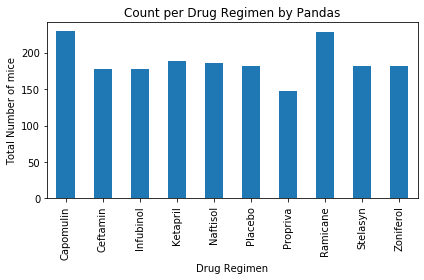

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Use DataFrame.plot() 
Grouped_regimen.plot(kind="bar")

# Set a title for the chart
plt.title("Count per Drug Regimen by Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of mice")
plt.tight_layout()
plt.show()

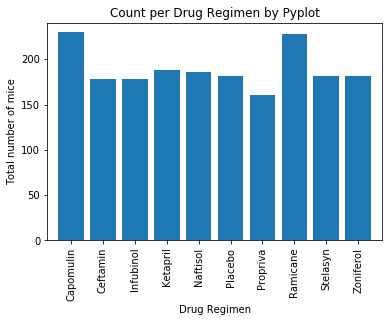

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create an array with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(Grouped_regimen))

plt.bar(x_axis, users,align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Count per Drug Regimen by Pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice")
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Groupby_gender = Pymaceuticals_df.groupby(["Mouse ID","Sex"])

mouse_gender_df = pd.DataFrame(Groupby_gender.size())

# Dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Create and format the percentage of Female vs Male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


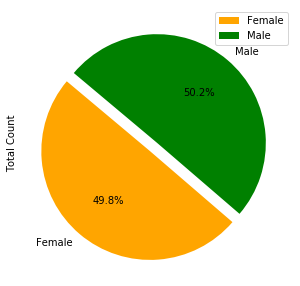

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Name of the data frame .plot.pie (sumplots true)
colors = ['orange', 'green']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = False, autopct="%1.1f%%")

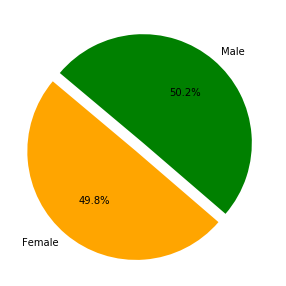

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# labels 
labels= ["Female","Male"]

# List values of each section of pie chart
sizes=[124,125]

# Set colors for each section of pie
colours =['orange','green']

# Section of the pie to be detached
explode= [0.1,0]

# Create pie chart based on the values
fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.pie (sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
Four_regimes = Pymaceuticals_df[Pymaceuticals_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
Four_regimes = Four_regimes.sort_values(["Timepoint"], ascending=True)
Four_regimes
Four_regimes_data = Four_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Four_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


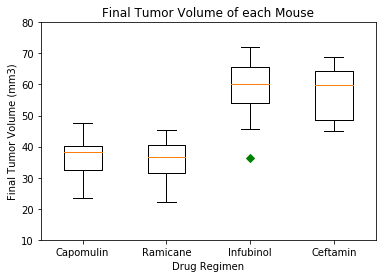

In [17]:
# Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_regimens_sort = Four_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Create a dataframe
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

# Create a list to use as labels and dataframe
Top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Final_df = best_regimen_df.reset_index()
Tumor_lists = Final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
Tumor_list_df = pd.DataFrame(Tumor_lists)
Tumor_list_df = Tumor_list_df.reindex(Top_4)
Tumor_vols = [vol for vol in Tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(Tumor_vols, labels=Top_4,notch=0,sym='gD')
plt.title("Final Tumor Volume of each Mouse")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.ylim(10, 80)
plt.show()

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

Cap_df = Pymaceuticals_df.loc[Pymaceuticals_df["Drug Regimen"] == "Capomulin",:]
Ram_df = Pymaceuticals_df.loc[Pymaceuticals_df["Drug Regimen"] == "Ramicane",:]
Inf_df = Pymaceuticals_df.loc[Pymaceuticals_df["Drug Regimen"] == "Infubinol",:]
Ceft_df = Pymaceuticals_df.loc[Pymaceuticals_df["Drug Regimen"] == "Ceftamin",:]
Cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [19]:
# Capomulin
Caplast = Cap_df.groupby('Mouse ID').max()['Timepoint']
Caplastvol = pd.DataFrame(Caplast)
Caplastmerge = pd.merge(Caplastvol, Pymaceuticals_df, on=("Mouse ID","Timepoint"),how="left")
Caplastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
# Capomulin Tumors and potential outliers
CapTumors = Caplastmerge["Tumor Volume (mm3)"]
quartiles = CapTumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} .")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 .


In [21]:
# Ramicane
Ramlast = Ram_df.groupby('Mouse ID').max()['Timepoint']
Ramlastvol = pd.DataFrame(Ramlast)
Ramlastmerge = pd.merge(Ramlastvol, Pymaceuticals_df, on=("Mouse ID","Timepoint"),how="left")
Ramlastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [22]:
# Ramicane Tumors and potential outliers
RamTumors = Ramlastmerge["Tumor Volume (mm3)"]
quartiles2 = RamTumors.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} .")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 .


In [23]:
# Infubinol
Inflast = Inf_df.groupby('Mouse ID').max()['Timepoint']
Inflastvol = pd.DataFrame(Inflast)
Inflastmerge = pd.merge(Inflastvol, Pymaceuticals_df, on=("Mouse ID","Timepoint"),how="left")
Inflastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [24]:
# Infubinol Tumors and potential outliers
InfTumors = Inflastmerge["Tumor Volume (mm3)"]
quartiles3 = InfTumors.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} .")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 .


In [25]:
# Ceftamin
Ceftlast = Ceft_df.groupby('Mouse ID').max()['Timepoint']
Ceftlastvol = pd.DataFrame(Ceftlast)
Ceftlastmerge = pd.merge(Ceftlastvol, Pymaceuticals_df, on=("Mouse ID","Timepoint"),how="left")
Ceftlastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [26]:
# Ceftamin Tumors and potential outliers
CeftTumors = Ceftlastmerge["Tumor Volume (mm3)"]
quartiles4 = CeftTumors.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq3 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} .")

Ceftamin potential outliers could be values below 25.355449580000002 and above 88.89237111999999 .


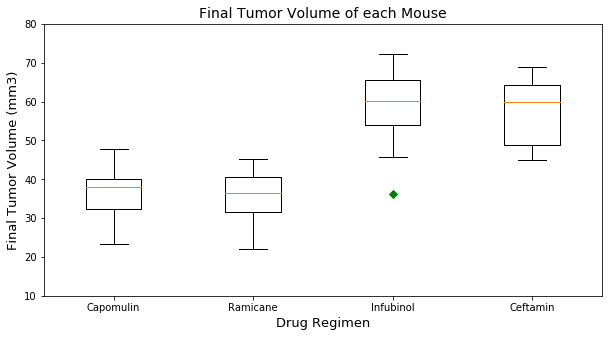

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [CapTumors, RamTumors, InfTumors, CeftTumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('Final Tumor Volume of each Mouse',fontsize =14)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 13)
ax1.set_xlabel('Drug Regimen',fontsize = 13)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4,notch=0,sym='gD')

plt.ylim(10, 80)

plt.show()


## Line and Scatter Plots

In [28]:
Newdata_df = Cap_df.loc[Cap_df["Mouse ID"] == "m601",:]
Newdata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1


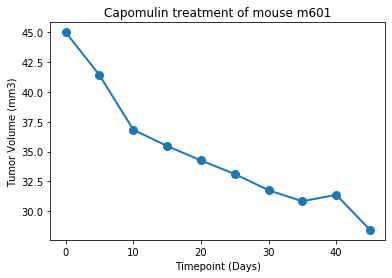

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axisTimePoint = Newdata_df["Timepoint"]
tumorvolume = Newdata_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse m601')
plt.plot(x_axisTimePoint, tumorvolume,linewidth=2, markersize=8,marker="o")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

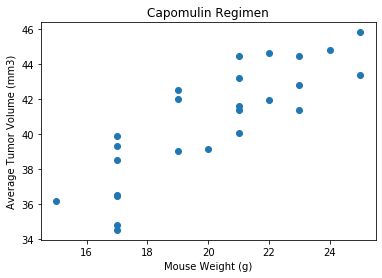

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capavg = Cap_df.groupby(['Mouse ID']).mean()
plt.scatter(Capavg['Weight (g)'],Capavg['Tumor Volume (mm3)'])
plt.title('Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Corr=round(st.pearsonr(Capavg['Weight (g)'],Capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {Corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [32]:
Regression_model=st.linregress(Capavg['Weight (g)'],Capavg['Tumor Volume (mm3)'])
Regression_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [33]:
x_values = Capavg['Weight (g)']
y_values = Capavg['Tumor Volume (mm3)']
slope=0.9544396890241045
intercept=21.552160532685015
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = 0.95x + 21.55


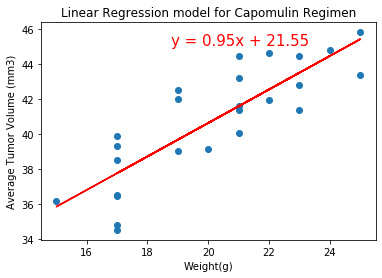

The r-squared is: 0.7088568047708717


In [34]:
# Capavg['Weight (g)']

mslope = 0.9544396890241045
bintercept = 21.552160532685015
rvalue=0.8419363424694718
y_values = Capavg['Weight (g)']*mslope+bintercept
plt.scatter(Capavg['Weight (g)'],Capavg['Tumor Volume (mm3)'])
plt.plot(Capavg['Weight (g)'],y_values,color="red")
plt.annotate(line_eq,(20,40),xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
plt.title('Linear Regression model for Capomulin Regimen')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The r-squared is: {rvalue**2}")